In [1]:
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from scipy.optimize      import curve_fit
import os

In [7]:
from IPython.display import IFrame, display
file = 'Lectures/Interpolacion_Newton.pdf'
IFrame(file, width=550, height=400)

# Método de Newton-Raphson
$x_{n+1} = x_{n} - \frac{f'(x_{n})}{f(x_{n})}$

In [26]:
def Function(x):
    #return x**x - 100
    return x**3 - 4*x**2 -2
    #return (2*x**4 - 2*x**3 + x**2 + 3*x - 4)

def Derivada(f,x,h):
    d = 0
    if(h != 0):
        d = (f(x+h)-f(x-h))/(2*h)
    return d

In [32]:
xi , xf, Npoints = 0.,5.,50
h = (xf-xi)/float(Npoints)

X = np.linspace(xi,xf,Npoints)
Y = Function(X)

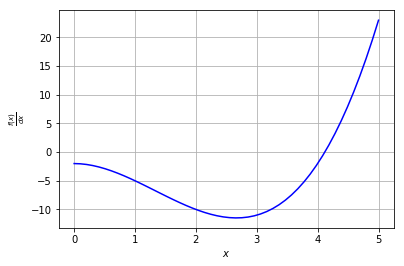

In [33]:
plt.plot(X,Y,'b', label='f(x)')
#plt.plot(X,DY,'r', label='f(x)')
#plt.yscale('log')
#plt.ylim(0.01, 10)
plt.xlabel(r'$x$')
plt.ylabel(r'$\frac{f(x)}{dx}$')
plt.grid()
plt.show()

In [14]:
def NewtonMethod(Function, Derivada, xn, error, iteracion):
    precision = 1.0e-3
    h = 1.0e-4
    
    if( (error > precision) and (iteracion < 10000) ):
        
        try:
            xn1 = xn - (Function(xn))/Derivada(Function, xn, h)
            error = abs(xn1-xn)/abs(xn1)
            
            NewtonMethod(Function, Derivada, xn1, error, iteracion+1)
        except ZeroDivisionError:
            print("Division by Zero")
    else:
        print('xn=%f, f(xn)=%f, f\'(xn)=%f' %(xn, Function(xn), Derivada(Function, xn, h)))

In [35]:
test = np.linspace(-100.,100.200)

#for i in test:
NewtonMethod(Function, Derivada, 60, 1000, 0)

xn=4.117943, f(xn)=0.000008, f'(xn)=17.928815


# Interpolación de lagrange

$p_{n}(x) = \sum_{i = 0}^{n} L_{i}(x)f(x_{i}), \ $
$L_{i}(x) = \prod_{j \neq i} \frac{x - x_{j}}{x_{i} - x_{j}}$

In [36]:
def Lagrange(x, xi, j, n):
    prod = 1.0
    for k in range(n+1):
        if(k != j):
            prod = prod*(x - xi[k])/(xi[j]-xi[k])
    return prod

In [39]:
def Poly(x, xi, fxi, n):
    summ = 0
    for j in range(n+1):
        summ = summ + fxi[j]*Lagrange(x,xi,j,n)
    return summ

In [47]:
X1 = [5.,10.]
Y1 = [10., 15.]

Data_ = np.arange(2., 12.+0.5, 0.5)

px1 = Poly(Data_, X1, Y1, 1)
print(Data_, px1)

(array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,
        7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ]), array([ 7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ,
       12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ]))


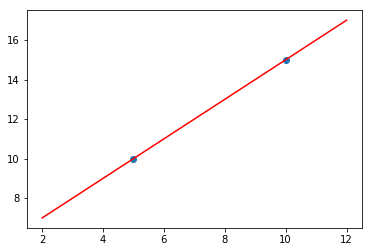

In [48]:
plt.plot(Data_,px1,'r', label='p(x)')
plt.scatter(X1,Y1,label='f(x)')

In [62]:
X1 = [-1,2,3,4]
Y1 = [3,1,2,4]

Data_ = np.arange(-2., 5.+0.5, 0.5)
px3 = Poly(Data_, X1, Y1, 3)
print(Data_, px3)

(array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ]), array([5.     , 3.93125, 3.     , 2.21875, 1.6    , 1.15625, 0.9    ,
       0.84375, 1.     , 1.38125, 2.     , 2.86875, 4.     , 5.40625,
       7.1    ]))


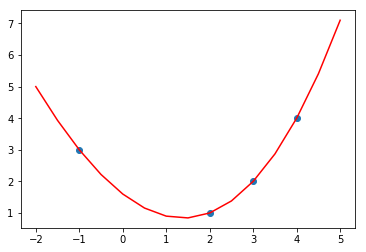

In [63]:
plt.plot(Data_,px3,'r', label='p(x)')
plt.scatter(X1,Y1,label='f(x)')

In [64]:
def f(x):
    return 1/(25*x**2 + 1)

In [81]:
xi, xf = -1., +1.
n = 10 # Grado del polinomio

h = (xf-xi)/n
print(h)

X = np.arange(xi, xf+h, h)
Y = f(X)

0.2


In [82]:
h2 = (xf-xi)/1000 
print(h2)
Data = np.arange(xi, xf+h2, h2)

0.002


In [83]:
px = Poly(Data, X, Y, n)
fx = f(Data)

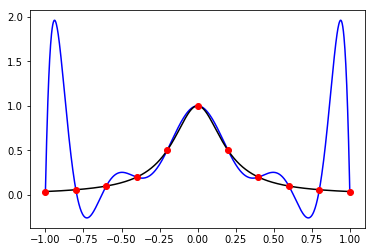

In [84]:
plt.plot(Data,px,'b', label='$p_{%d}(x)$' %(n))
plt.plot(Data,fx,'k', label='f(x)')
plt.plot(X,Y,'ro', label='puntos interpolacion')